In [25]:
# Қажетті кітапханаларды импорттау
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Графиктердің өлшемін орнату
plt.rcParams['figure.figsize'] = (10, 6)



In [24]:
# 1. Iris датасетін жүктеу
iris = datasets.load_iris()
X = iris.data  # Признактар (features)
y = iris.target  # Мақсатты айнымалы (target)


In [23]:
# 2. Деректі 80% / 20% бөліп бөлу
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [21]:
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train, y_train)
y_pred_3 = knn_3.predict(X_test)
accuracy_3 = accuracy_score(y_test, y_pred_3)

print(f"✅ Accuracy (k=3): {accuracy_3:.4f} ({accuracy_3*100:.2f}%)")


✅ Accuracy (k=3): 1.0000 (100.00%)


In [22]:
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_7.fit(X_train, y_train)
y_pred_7 = knn_7.predict(X_test)
accuracy_7 = accuracy_score(y_test, y_pred_7)

print(f"✅ Accuracy (k=7): {accuracy_7:.4f} ({accuracy_7*100:.2f}%)")


✅ Accuracy (k=7): 0.9667 (96.67%)


In [18]:
results = {
    'K=3': accuracy_3,
    'K=7': accuracy_7
}

for k, acc in results.items():
    print(f"{k}: {acc:.4f} ({acc*100:.2f}%)")

# Ең жақсы k мәнін анықтау
best_k = max(results, key=results.get)



K=3: 1.0000 (100.00%)
K=7: 0.9667 (96.67%)


In [39]:
from sklearn.preprocessing import StandardScaler


In [40]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [41]:
# --- 1. SCALING ЖОҚ (Без масштабирования) ---
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
acc_no_scale = accuracy_score(y_test, knn.predict(X_test))


In [42]:

# --- 2. SCALING БАР (С масштабированием) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
acc_with_scale = accuracy_score(y_test, knn_scaled.predict(X_test_scaled))


In [43]:

print(f"❌ Accuracy (StandardScaler жоқ): {acc_no_scale:.4f}")
print(f"✅ Accuracy (StandardScaler бар): {acc_with_scale:.4f}")

❌ Accuracy (StandardScaler жоқ): 0.8333
✅ Accuracy (StandardScaler бар): 1.0000


In [52]:
# 2. K мәндерін іздеу (Cross-Validation арқылы)
k_values = range(1, 21)
cv_scores = [] # Орташа ұпайларды жинаймыз

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # cv=5 дегеніміз деректерді 5-ке бөліп тексереміз
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean()) # 5 нәтиженің орташасын аламыз



In [53]:
# 3. Оптималды K
max_score = max(cv_scores)
best_k = [k for k, score in zip(k_values, cv_scores) if score == max_score]

print(f"🏆 Ең жоғары орташа Accuracy: {max_score:.4f}")
print(f"✅ Нағыз оптималды K: {best_k}")



🏆 Ең жоғары орташа Accuracy: 0.9800
✅ Нағыз оптималды K: [6, 7, 10, 11, 12]


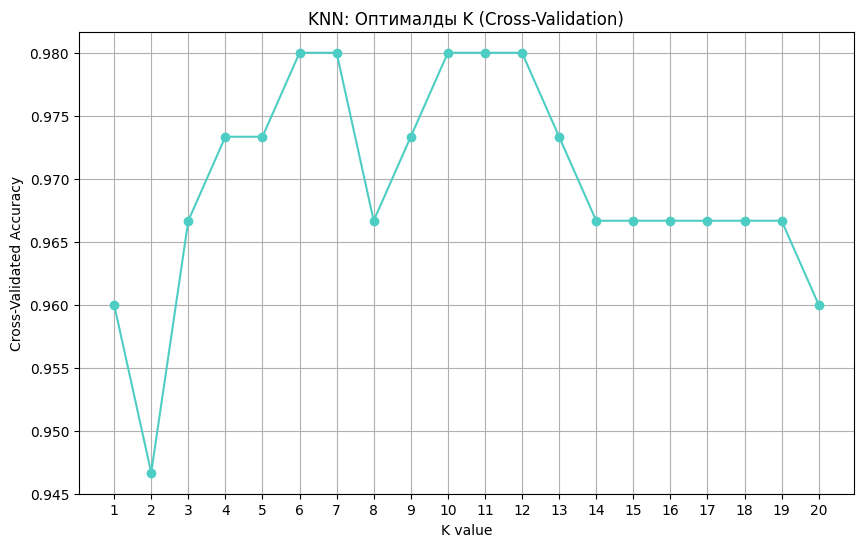

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='-', color='#4ECDC4', label='CV Accuracy')
plt.xlabel('K value')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN: Оптималды K (Cross-Validation)')
plt.grid(True)
plt.xticks(k_values)
plt.show()